In [2]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

plt.style.use("dark_background")

In [28]:
import numpy as np

def rgb_to_hexint_image(rgb_image):
    """
    Converts an RGB image (H, W, 3) to a 2D image (H, W) with integer hex values.
    Example: [255, 0, 170] → 0xFF00AA → 16711850
    """
    r = rgb_image[:, :, 0].astype(np.uint32)
    g = rgb_image[:, :, 1].astype(np.uint32)
    b = rgb_image[:, :, 2].astype(np.uint32)
    hexint_image = (r << 16) + (g << 8) + b
    return hexint_image


def hexint_to_rgb_image(hexint_image):
    """
    Converts a 2D image (H, W) with integer hex values back to an RGB image (H, W, 3).
    Example: 16711850 → [255, 0, 170]
    """
    r = (hexint_image >> 16) & 0xFF
    g = (hexint_image >> 8) & 0xFF
    b = hexint_image & 0xFF
    rgb_image = np.stack([r, g, b], axis=-1).astype(np.uint8)
    return rgb_image

In [25]:
def vertical_filter(image):
    img_arr = np.array(image, dtype=np.float32)
    
    height, width, channels = img_arr.shape
    for h in range(height):
        for w in range(width - 1):
            for c in range(channels):
                img_arr[h, w, c] = abs(img_arr[h, w, c] - img_arr[h, w + 1, c])
    
    return img_arr.astype(np.uint8)


def horizontal_filter(image):
    img_arr = np.array(image, dtype=np.float32)
    
    height, width, channels = img_arr.shape
    for h in range(height - 1):
        for w in range(width):
            for c in range(channels):
                img_arr[h, w, c] = abs(img_arr[h, w, c] - img_arr[h + 1, w, c])
    
    return img_arr.astype(np.uint8)


def plot_filters(image, show=False, ret=False):
    vf = vertical_filter(image)
    hf = horizontal_filter(image)
    
    if show:
        Image.fromarray(vf).show()
        Image.fromarray(hf).show()
    
    fig, (ax1, ax2) = plt.subplots(1, 2)

    ax1.imshow(vf)
    ax2.imshow(hf)
    ax1.set_title("Vertical Filter")
    ax2.set_title("Horizontal Filter")

    fig.set_size_inches(9, 4)
    plt.tight_layout()
    
    if ret:
        return vf, hf

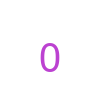

In [36]:
img = Image.open("data/0/0.png")
img

In [38]:
vf_arr = vertical_filter(img)
hf_arr = horizontal_filter(vf_arr)

Image.fromarray(vf_arr).show()

In [17]:
vf_arr.min()

np.int8(-127)

In [33]:
arr = np.random.randint(0, 256, size=(5, 5, 3))

np.equal(
    hexint_to_rgb_image(rgb_to_hexint_image(arr)),
    arr
).all()

np.True_